## Step 1. 데이터 둘러보기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
from sklearn.preprocessing import LabelEncoder

In [2]:
trip_df = pd.read_csv('~/aiffel/0119_ManageData/TaxiFare/trip.csv')

In [3]:
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


---
### Startegy 1

'payment_method'에 몇 개의 범주인지 확인하고 범주형이 아닌 수치형 데이터로 변경한다. (아마도 원-핫 인코딩?)

---

In [4]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


---
### Startegy 2
object인 'tpep_pickup_datetime'과 'tpep_dropoff_datetime'의 DataType을 datetime으로 바꾼다. 두 값을 통해 주행시간을 알 수 있다

---

In [5]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


---
### Startegy 3
모든 컬럼에서 max 값이 min ~ 75% 이내 값들에 비해 매우 크기 때문에 outlier가 있는지 확인하고 처리한다.   

### Startegy 4
fare_amount에 min과 std 값이 수상하다. 음수로 된 부분을 확인하고 처리한다.

---

## Step 2. 결측치 판단 및 처리

In [6]:
# 열별 결측치 비율 확인

trip_df.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

---
### Startegy 5
fare_amount에 결측치가 0.0132% 있다. -> 적은 양이므로 과감하게 제거한다. (∵ 22701개의 풍부한 데이터)

---

In [7]:
# fare_amount 결측치 포함 행 확인

trip_df[trip_df['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [8]:
# 결측치 포함 행 제거

trip_df = trip_df.dropna()
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22698 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22698 non-null  object 
 1   tpep_pickup_datetime   22698 non-null  object 
 2   tpep_dropoff_datetime  22698 non-null  object 
 3   payment_method         22698 non-null  object 
 4   passenger_count        22698 non-null  int64  
 5   trip_distance          22698 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22698 non-null  float64
 8   tolls_amount           22698 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


---
### Startegy 5 

5. ~~fare_amount에 결측치가 0.0132% 있다. -> 적은 양이므로 과감하게 제거한다. (∵ 22701개의 풍부한 데이터)~~

### 해결 완료 
---

## Step 3. 이상치 판단 및 처리
1. 각 컬럼별 아웃라이어 확인하기
2. fare_amount 아웃라이어 더 자세히 확인하기

### 1. 이상치 확인을 위한 box / scatter plots

#### (1) The outlier of 'passenger_count'

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count'>

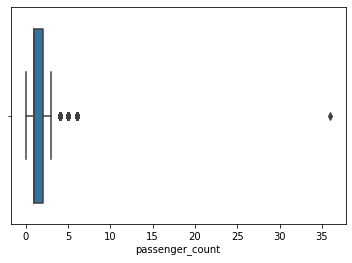

In [9]:
sns.boxplot(trip_df['passenger_count'])

<AxesSubplot:ylabel='passenger_count'>

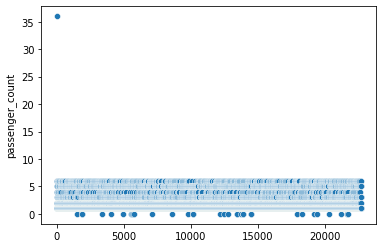

In [10]:
sns.scatterplot(x = trip_df.index, y = trip_df['passenger_count'])

---
### Startegy 6
해당 데이터들은 택시 요금에 관련된 데이터이다. 택시 탑승 가능 인원은 아무리 대형 택시여도 13인승 이하이기 때문에 outlier 중 35를 넘어가는 값은 이상치이므로 확인하고 제거한다.

### Startegy 7
0명의 탑승객을 태운 데이터들을 확인해보고 의미가 없으면 제거해도 될 거 같다.

---

#### (2) The outlier of 'fare_amount'

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

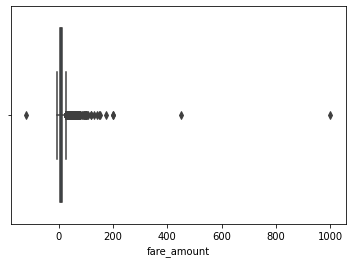

In [11]:
sns.boxplot(trip_df['fare_amount'])

<AxesSubplot:ylabel='fare_amount'>

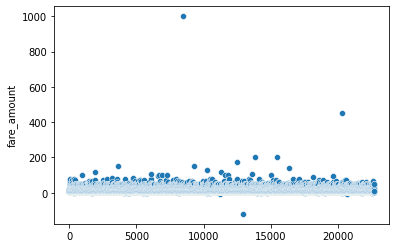

In [12]:
sns.scatterplot(x = trip_df.index, y = trip_df['fare_amount'])

---
### Startegy 8
요금은 음수가 나올 수 없는 데이터이기 때문에 음수에 해당하는 행을 제거한다.


### Startegy 9
400과 1000 이상의 값을 가진 데이터를 확인해볼 필요가 있다.

---

#### (3) The outlier of 'trip_distance'

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

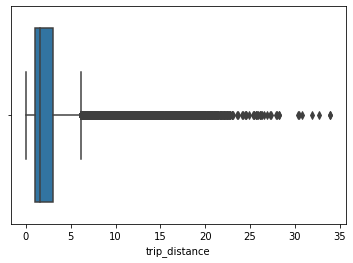

In [13]:
sns.boxplot(trip_df['trip_distance'])

<AxesSubplot:ylabel='trip_distance'>

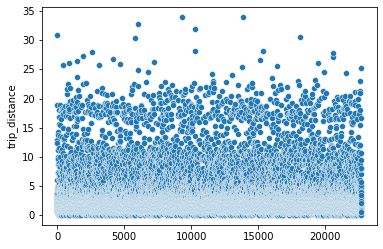

In [14]:
sns.scatterplot(x = trip_df.index, y = trip_df['trip_distance'])

---
택시의 이동거리는 천차만별이라는 특성 때문에 그래프상 아웃라이어라 해도 정상 데이터로 판단해도 된다.

### Startegy 10

startegy 7번과 마찬가지로 이동거리가 0인 데이터들을 확인해보고 의미가 없으면 제거해도 될 거 같다.

---

#### (4) The outlier of 'tip_amount'

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip_amount'>

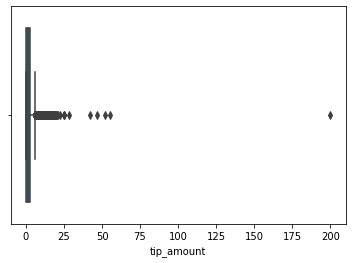

In [15]:
sns.boxplot(trip_df['tip_amount'])

<AxesSubplot:ylabel='tip_amount'>

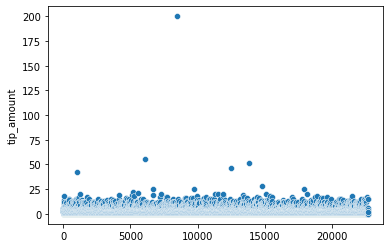

In [16]:
sns.scatterplot(x = trip_df.index, y = trip_df['tip_amount'])

#### (5) The outlier of 'tolls_amount'

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tolls_amount'>

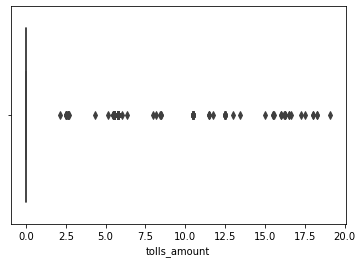

In [17]:
sns.boxplot(trip_df['tolls_amount'])

<AxesSubplot:ylabel='tolls_amount'>

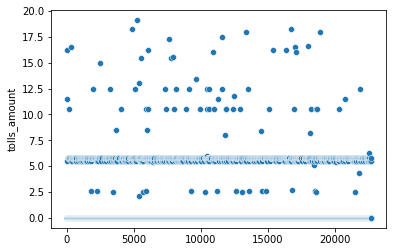

In [18]:
sns.scatterplot(x = trip_df.index, y = trip_df['tolls_amount'])

---
팁은 손님재량이고 톨비는 거리에 비례하거나 가는 지역에 따라 다르기 때문에 boxplot만으로는 판단하기 어렵다. 정상 데이터로 판단하고 넘어간다.

---

### 2. 이상치 데이터 내용 확인 및 처리

#### (1) The outlier of 'passenger_count'

In [19]:
# passenger_count가 36인 값 확인하기
trip_df[trip_df['passenger_count'] == 36]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
64,Manuel Dickson,10/05/2017 9:39:28 AM,10/05/2017 9:42:32 AM,Debit Card,36,0.22,21.5,0.0,0.0


In [20]:
# passenger_count가 36인 값 제거하기
trip_df = trip_df[trip_df['passenger_count'] < 36]

<AxesSubplot:ylabel='passenger_count'>

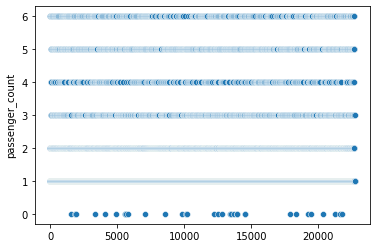

In [21]:
sns.scatterplot(x = trip_df.index, y = trip_df['passenger_count'])

---
### Startegy 6 
passenger_count 값 말고도 distance에 적합한 fare_amount로 보인다. 전체적으로 잘못된 데이터로 보여 제거한다.

6. ~~해당 데이터들은 택시 요금에 관련된 데이터이다. 택시 탑승 가능 인원은 아무리 대형 택시여도 13인승 이하이기 때문에 outlier 중 35를 넘어가는 값은 이상치이므로 확인하고 제거한다.~~

### 해결 완료 - passenger_count의 outlier 제거

---

In [22]:
# passenger_count가 0인 값 확인하기
trip_df[trip_df['passenger_count'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1518,Sophia Hernandez,11/14/2017 3:45:23 PM,11/14/2017 4:26:38 PM,Debit Card,0,8.8,33.0,5.55,5.76
1876,Tommy Weaver,12/03/2017 12:05:52 PM,12/03/2017 12:13:51 PM,Cash,0,1.1,7.0,0.00,0.00
1927,Melissa Thompson,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.8,5.0,0.00,0.00
3354,Lisa Wilson,12/18/2017 10:44:57 PM,12/18/2017 11:00:24 PM,Cash,0,2.7,12.5,2.75,0.00
4062,Benjamin Anderson,11/27/2017 1:08:01 PM,11/27/2017 1:17:55 PM,Debit Card,0,1.7,9.0,1.95,0.00
4921,Austin Gutierrez,12/16/2017 2:59:17 PM,12/16/2017 3:21:59 PM,Debit Card,0,3.1,15.5,4.05,0.00
5565,Charles Stewart,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.3,9.0,1.95,0.00
5605,Kristina Smith,12/17/2017 12:18:49 PM,12/17/2017 12:40:45 PM,Cash,0,4.2,18.0,3.75,0.00
5670,Susan Cook,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.0,8.0,1.50,0.00
5769,Rebecca Curry,10/04/2017 3:17:52 PM,10/04/2017 3:56:26 PM,Cash,0,10.4,34.0,8.10,5.76


---
passenger_count가 0인 값들을 어떻게 해결해야 할지 고민이다.   
보통 택시 요금은 대형 택시가 아니면 탑승객 수에 영향을 많이 받지 않기 때문에 거리와 요금의 관계를 scatterplot으로 그려보고 그 결과에서 이상치를 확인해봐야겠다

---

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

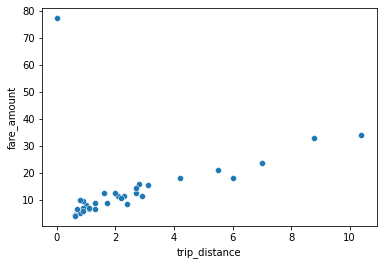

In [23]:
# 탑승객이 0일 때 거리와 요금의 상관관계를 확인하기 위해 그린 scatter plot 그래프
sns.scatterplot(x = trip_df['trip_distance'][trip_df['passenger_count'] == 0], y = trip_df['fare_amount'][trip_df['passenger_count'] == 0])

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

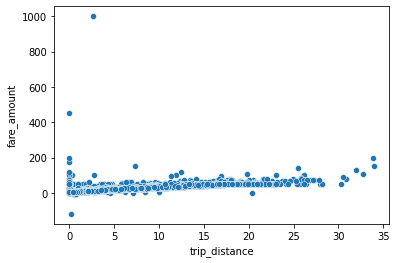

In [24]:
# 전체 데이터의 거리와 요금의 상관관계를 확인하기 위해 그린 scatter plot 그래프
sns.scatterplot(x = trip_df['trip_distance'], y = trip_df['fare_amount'])

<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

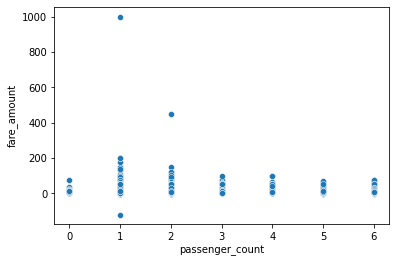

In [25]:
# 전체 데이터의 탑승객 수와 요금의 상관관계를 확인하기 위해 그린 scatter plot 그래프
sns.scatterplot(x = trip_df['passenger_count'], y = trip_df['fare_amount'])

In [26]:
trip_df['fare_amount'][trip_df['passenger_count'] == 0] > 70

1518     False
1876     False
1927     False
3354     False
4062     False
4921     False
5565     False
5605     False
5670     False
5769     False
7104     False
8597     False
9830     False
10147    False
10201    False
12205    False
12503     True
12804    False
13421    False
13479    False
13718    False
13921    False
13923    False
14521    False
14529    False
17916    False
18311    False
19219    False
19458    False
20312    False
21218    False
21640    False
21754    False
Name: fare_amount, dtype: bool

In [27]:
# 이상치인 12503행 삭제
trip_df = trip_df.drop(12503)

In [28]:
# passenger_count 값이 0인 부분 1로 변경
trip_df['passenger_count'] = trip_df['passenger_count'].replace({0:1})
trip_df[trip_df['passenger_count'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


<AxesSubplot:ylabel='passenger_count'>

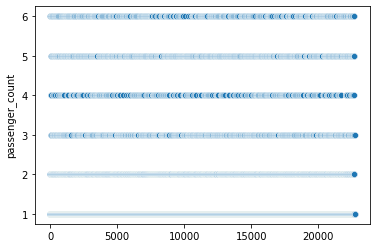

In [29]:
# passenger_count 컬럼의 아웃라이어를 확인하기 위해, Scatter Plot 그리기
sns.scatterplot(x = trip_df.index, y = trip_df['passenger_count'])

---
### Startegy 7 
거리와 요금의 경향성을 보니 한 데이터를 제외하고 모두 탑승객 수만 누락된 것으로 보인다.   
요금과 탑승객 수의 관계성은 크게 없기 때문에 0이었던 나머지 값들을 1로 교체했다.

7. ~~0명의 탑승객을 태운 데이터들을 확인해보고 의미가 없으면 제거해도 될 거 같다.~~

### 해결 완료 - passenger_count의 outlier 제거 및 처리

---

#### (2) The outlier of 'fare_amount'

In [30]:
# fare_amount가 400 초과인 값 확인하기
trip_df[trip_df['fare_amount'] > 400]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.6,999.99,200.0,0.0
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.0,450.00,0.0,0.0


In [31]:
# fare_amount가 0 이하인 값 확인하기
trip_df[trip_df['fare_amount'] <= 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5724,William Holland,06/12/2017 12:08:55 PM,06/12/2017 12:08:57 PM,Debit Card,1,0.00,0.0,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
10283,Donna Larson,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Credit Card,2,0.00,-2.5,0.0,0.0
10508,Travis Vega,03/30/2017 3:14:26 AM,03/30/2017 3:14:28 AM,Debit Card,1,0.00,0.0,0.0,0.0


In [32]:
trip_df = trip_df[trip_df['fare_amount'] < 400]

In [33]:
trip_df = trip_df[trip_df['fare_amount'] > 0]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

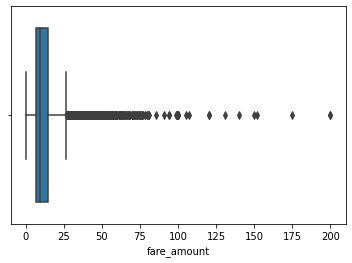

In [34]:
# fare_amount 컬럼의 아웃라이어를 확인하기 위해, Box Plot 그리기
sns.boxplot(trip_df['fare_amount'])

---
### Startegy 8
### Startegy 9
400 초과 0 이하의 값들은 잘못된 데이터로 판단이 되고, 그 수가 적기 때문에 과감하게 제거했다.

~~요금은 음수가 나올 수 없는 데이터이기 때문에 음수에 해당하는 행을 제거한다.~~
~~400과 1000 이상의 값을 가진 데이터를 확인해볼 필요가 있다.~~

### 해결 완료 - fare_amount의 outlier 제거

---

#### (3) The outlier of 'trip_distance'

In [35]:
# trip_distance가 0인 값 확인하기
trip_df[trip_df['trip_distance'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22045,Kelly Perez MD,07/06/2017 10:27:11 AM,07/06/2017 10:40:07 AM,Cash,1,0.0,52.0,0.00,0.0
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0


<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

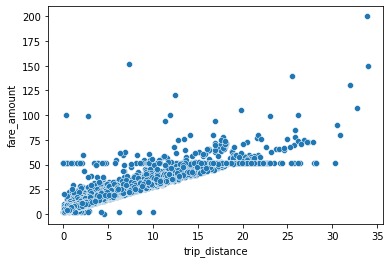

In [36]:
# 전체 데이터의 거리와 요금의 상관관계를 확인하기 위해 그린 scatter plot 그래프
sns.scatterplot(x = trip_df['trip_distance'][trip_df['trip_distance'] != 0], y = trip_df['fare_amount'][trip_df['trip_distance'] != 0])

In [37]:
# trip_distance가 0이 아닌 데이터의 거리와 요금의 비율 (주행거리/요금) 확인하기 위해 'distance_fare_ratio' 컬럼 생성
trip_df['distance_fare_ratio'] = trip_df['trip_distance'][trip_df['trip_distance'] != 0] / trip_df['fare_amount'][trip_df['trip_distance'] != 0]

# 'distance_fare_ratio' (주행거리/요금) 컬럼의 평균
trip_df['distance_fare_ratio'].mean()

0.21127823935717016

In [38]:
# (주행거리/요금) 평균 값을 'trip_distance'가 0인 'fare_amount'에 곱한다
trip_df['fare_amount'][trip_df['trip_distance'] == 0].apply(lambda x: trip_df['distance_fare_ratio'].mean() * x)

129       4.225565
248       0.528196
293       0.528196
321       0.528196
426       0.528196
           ...    
22045    10.986468
22192     0.528196
22327     3.549474
22385     2.112782
22672     0.528196
Name: fare_amount, Length: 142, dtype: float64

In [39]:
# 'trip_distance'가 0인 값들을 위의 값들로 대체한다   
trip_df['trip_distance'][trip_df['trip_distance'] == 0] = trip_df['fare_amount'][trip_df['trip_distance'] == 0].apply(lambda x: x * trip_df['distance_fare_ratio'].mean()).round(2)

In [40]:
trip_df.loc[:,['trip_distance','fare_amount','distance_fare_ratio']]

,trip_distance,fare_amount,distance_fare_ratio
0,3.34,13.0,0.256923
1,1.80,16.0,0.112500
2,1.00,6.5,0.153846
3,3.70,20.5,0.180488
4,4.37,16.5,0.264848
...,...,...,...
22696,0.61,4.0,0.152500
22697,16.71,52.0,0.321346
22698,0.42,4.5,0.093333
22699,2.36,10.5,0.224762


<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

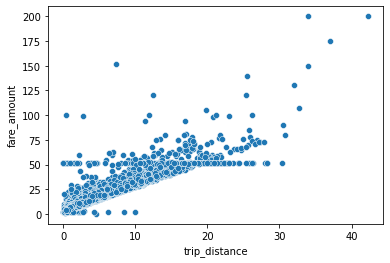

In [41]:
sns.scatterplot(x = trip_df['trip_distance'][trip_df['trip_distance'] != 0], y = trip_df['fare_amount'][trip_df['trip_distance'] != 0])

---
### Startegy 10 해결 완료 - trip_distance를 outlier 처리
'trip_distance'가 0인 값은 142개로 과감하게 데이터를 삭제하기에는 조금 애매한 수인 것 같다.   
일반적으로 주행거리('trip_distance')와 택시 요금('fare amount')와 관련이 있기 때문에 두 컬럼간의 관계성을 살펴봐야 할 것 같다.   
주행거리가 0이 아닌 값들의 scatter plot을 그려보니 두 컬럼의 데이터들은 전반적으로 양의 상관관계를 나타내고 있다.   
두 데이터의 비율을 이용해 trip_distance가 0인 데이터들의 값을 대체했다.   
~~startegy 7번과 마찬가지로 이동거리가 0인 데이터들을 확인해보고 의미가 없으면 제거해도 될 거 같다.~~

---

---
### Startegy 4,
~~모든 컬럼에서 max 값이 min ~ 75% 이내 값들에 비해 매우 크기 때문에 outlier가 있는지 확인하고 처리한다.~~

### Startegy 5 
~~fare_amount에 min과 std 값이 수상하다. 음수로 된 부분을 확인하고 처리한다.~~

### 해결 완료 - 모든 이상치 처리

---

## Step 4. 추가 실습

### 1. 택시 탑승 및 하차 시간을 활용할 수 있을지 고민해보세요.
#### [힌트] 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계도 살펴볼 수 있겠죠?

#### (1) object인 'tpep_pickup_datetime'과 'tpep_dropoff_datetime'의 DataType을 datetime으로 바꾼다.

In [42]:
trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])
trip_df['tpep_dropoff_datetime'] = pd.to_datetime(trip_df['tpep_dropoff_datetime'])
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22674 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22674 non-null  object        
 1   tpep_pickup_datetime   22674 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22674 non-null  datetime64[ns]
 3   payment_method         22674 non-null  object        
 4   passenger_count        22674 non-null  int64         
 5   trip_distance          22674 non-null  float64       
 6   fare_amount            22674 non-null  float64       
 7   tip_amount             22674 non-null  float64       
 8   tolls_amount           22674 non-null  float64       
 9   distance_fare_ratio    22532 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 2.4+ MB


---
### Startegy 2 해결 완료 - 데이터타입 변경
2. ~~object인 'tpep_pickup_datetime'과 'tpep_dropoff_datetime'의 DataType을 datetime으로 바꾼다.~~

---

#### (2) 주행 시간 구하기

In [43]:
## 'tpep_dropoff_datetime' 시간 - 'tpep_pickup_datetime' 시간
## 'driving_time'은 timedelta 형
trip_df['driving_time'] = trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime']
trip_df['driving_time']

0       0 days 00:14:04
1       0 days 00:26:30
2       0 days 00:07:12
3       0 days 00:30:15
4       0 days 00:16:43
              ...      
22696   0 days 00:03:16
22697   0 days 00:40:48
22698   0 days 00:04:08
22699   0 days 00:11:56
22700   0 days 00:13:20
Name: driving_time, Length: 22674, dtype: timedelta64[ns]

In [44]:
time_comp = trip_df['driving_time'].dt.components
time_comp

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,0,14,4,0,0,0
1,0,0,26,30,0,0,0
2,0,0,7,12,0,0,0
3,0,0,30,15,0,0,0
4,0,0,16,43,0,0,0
...,...,...,...,...,...,...,...
22696,0,0,3,16,0,0,0
22697,0,0,40,48,0,0,0
22698,0,0,4,8,0,0,0
22699,0,0,11,56,0,0,0


In [45]:
# driving_time 값을 초 단위로 변환
trip_df['driving_time'] = time_comp['days'] * 24 * 60 * 60 + time_comp['hours'] * 60 * 60 + time_comp['minutes'] * 60 + time_comp['seconds']
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,distance_fare_ratio,driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,0.256923,844
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,0.112500,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,0.153846,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,0.180488,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,0.264848,1003
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,0.152500,196
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,0.321346,2448
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,0.093333,248
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,0.224762,716


#### (3) The outlier of 'driving_time'

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='driving_time'>

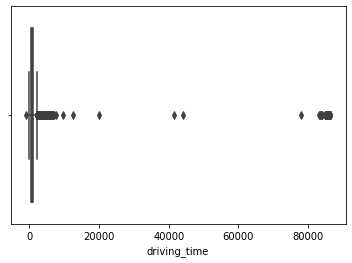

In [46]:
sns.boxplot(trip_df['driving_time'])

In [50]:
trip_df[trip_df['driving_time'] <= 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,distance_fare_ratio,driving_time
474,Nancy Knight,2017-06-20 18:57:39,2017-06-20 18:57:39,Debit Card,1,2.01,9.50,0.0,0.0,NaN,0
797,Jason Sanchez,2017-11-30 07:11:34,2017-11-30 07:11:34,Cash,1,1.69,8.00,0.0,0.0,NaN,0
1207,Jessica Mcdonald,2017-01-18 17:53:45,2017-01-18 17:53:45,Cash,1,0.53,2.50,0.0,0.0,NaN,0
2442,Holly Olson,2017-07-26 22:26:58,2017-07-26 22:26:58,Cash,1,1.16,5.50,0.0,0.0,NaN,0
2742,Jennifer Williams,2017-05-12 12:49:56,2017-05-12 12:49:56,Credit Card,1,2.43,11.50,0.0,0.0,NaN,0
4173,Kathleen Elliott,2017-02-16 20:37:04,2017-02-16 20:37:04,Debit Card,1,2.01,9.50,0.0,0.0,NaN,0
4744,Ashley Fuller,2017-03-05 06:41:16,2017-03-05 06:41:16,Credit Card,1,17.08,80.84,0.0,0.0,NaN,0
5632,Jacqueline Allison,2017-01-29 20:16:21,2017-01-29 20:16:21,Debit Card,1,8.35,39.50,0.0,0.0,NaN,0
7329,Robert Day,2017-03-08 16:11:57,2017-03-08 16:11:57,Credit Card,1,5.07,24.00,0.0,0.0,NaN,0
8841,Troy Cox,2017-02-08 17:54:50,2017-02-08 17:54:50,Cash,1,3.91,18.50,0.0,0.0,NaN,0


In [52]:
trip_df['driving_time'][trip_df['driving_time'] <= 0].count()

26

---
### Startegy 11
'driving_time'이 0 이하인 데이터는 26개 있고 이는 잘못된 값이고 그 수가 적으므로 과감히 삭제하기로 한다.

---

In [53]:
trip_df = trip_df[trip_df['driving_time'] > 0]

In [54]:
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,distance_fare_ratio,driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,0.256923,844
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,0.112500,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,0.153846,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,0.180488,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,0.264848,1003
...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,0.152500,196
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,0.321346,2448
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,0.093333,248
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,0.224762,716


In [133]:
trip_df = trip_df[trip_df['driving_time'] >= 0]
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,844
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,1003
...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,196
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,2448
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,248
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,716


---
### Startegy 11
~~'driving_time'이 0 이하인 데이터는 26개 있고 이는 잘못된 값이고 그 수가 적으므로 과감히 삭제하기로 한다.~~
### 해결완료 - driving time 이상치 제거

---

20000초 이상의 값은 미터기로만 운행했다고 생각하면 이상치로 보인다.   
그러나 경험/상식 내에서 생각해봤을 때 어느 정도 거리 이상이면 미터기가 아닌 승객/기사 간의 딜을 통해 운행하기도 한다

#### (4) 주행시간과 택시 요금 상관관계 확인하기

<AxesSubplot:xlabel='fare_amount', ylabel='driving_time'>

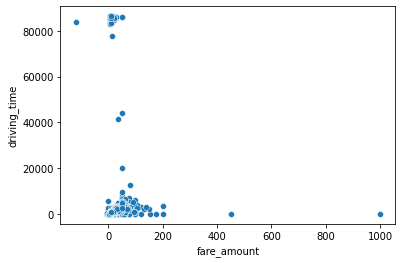

In [134]:
sns.scatterplot(x = trip_df['fare_amount'], y = trip_df['driving_time'])

모든 데이터들에 대해 상관관계를 확인해보니 15000초 이상의 값들이 확실히 이상치로 보인다.   
일단 15000초 이상의 값들을 제외하고 상관관계를 확인해보자.

<AxesSubplot:xlabel='driving_time', ylabel='fare_amount'>

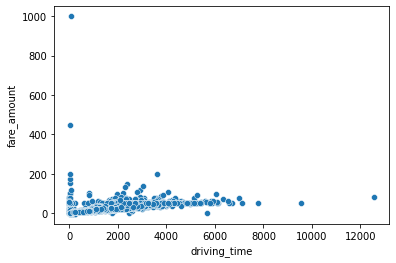

In [135]:
sns.scatterplot(x = trip_df['driving_time'][trip_df['driving_time'] < 15000], y = trip_df['fare_amount'], )

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

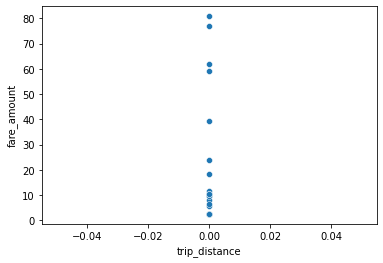

In [136]:
sns.scatterplot(x = trip_df['trip_distance'][trip_df['driving_time'] == 0], y = trip_df['fare_amount'][trip_df['driving_time'] == 0])


1. 이상치로 여긴 데이터를 제외한 scatter plot을 해석해보면 주행시간과 driving time은 어느 정도 양의 상관관계를 이루고 있다.
2. fare_amount가 50 부근에서 수평으로 데이터가 모여있는 부분을 통해서는 50이 기본요금인 것으로 예상이 된다.
3. driving_time이 0 부근의 값들은 이상치인 것으로 보인다 -> 그러나 이 데이터에서 

### 2. Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.

In [44]:
payment_method_groupby = trip_df.groupby('payment_method').count()
payment_method_groupby

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,distance_fare_ratio,driving_time
payment_method,,,,,,,,,,
Cash,11184,11184,11184,11184,11184,11184,11184,11184,11112,11184
Credit Card,5716,5716,5716,5716,5716,5716,5716,5716,5681,5716
Debit Card,5774,5774,5774,5774,5774,5774,5774,5774,5739,5774


In [45]:
le = LabelEncoder()
le_genre = le.fit(trip_df['payment_method'])
trip_df['payment_label'] = le.transform(trip_df['payment_method'])
trip_df[['payment_method','payment_label']].head(20)

,payment_method,payment_label
0,Debit Card,2
1,Debit Card,2
2,Debit Card,2
3,Cash,0
4,Debit Card,2
5,Debit Card,2
6,Cash,0
7,Debit Card,2
8,Cash,0
9,Cash,0


---
### Startegy 1 
1. ~~'payment_method'의 종류를 확인하고 범주형이 아닌 수치형 데이터로 변경한다. (아마도 원-핫 인코딩)~~

### 해결 완료 - 라벨인코딩

---

---
### Startegy 12
Debit/Credit Card로 결제된 데이터들을 모두 Card로 데이터 대체한다.

---

In [170]:
#trip_df['simple_payment_method'] 
trip_df['payment_simple'] = trip_df['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card'})
trip_df['payment_simple']

0        Card
1        Card
2        Card
3        Cash
4        Card
         ... 
22696    Cash
22697    Cash
22698    Card
22699    Card
22700    Cash
Name: payment_simple, Length: 22648, dtype: object

---
### Startegy 12
~~Debit/Credit Card로 결제된 데이터들을 모두 Card로 데이터 대체한다.~~

### 해결 완료 - 추가실습 2

---

In [176]:
method = pd.get_dummies(trip_df['payment_simple'])
trip_df = pd.concat([trip_df, method], axis=1)
trip_df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_time,payment_simple,Card,Cash
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13.0,2.76,0.00,844,Card,1,0
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.80,16.0,4.00,0.00,1590,Card,1,0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1.00,6.5,1.45,0.00,432,Card,1,0
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,1815,Cash,0,1
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0.00,0.00,1003,Card,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,196,Cash,0,1
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,2448,Cash,0,1
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0.00,0.00,248,Card,1,0
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.70,0.00,716,Card,1,0


---
### Startegy 1 
1. ~~'payment_method'의 종류를 확인하고 범주형이 아닌 수치형 데이터로 변경한다. (아마도 원-핫 인코딩)~~

### 해결 완료 - 원-핫 인코딩

---

## 전체 회고

데이터 전처리를 할 때는 정말 많은 것들을 고려해야 한다는 것을 알았다   
각 컬럼별로 이상치를 확인하고 각 컬럼에서만 그 이상치를 해결하는 것이 아니라 상관관계를 따지면서 해결해야 한다고 생각이 들었다   
처음에는 컬럼별로 이상치를 해결하려고만 했는데 하나하나 처리하다보니 상관관계를 따지지 않아 데이터가 꼬였을 수도 있겠다고 느껴졌다   
생각보다 할 것도 많고 신경 쓸 것도 많지만 그 과정이 재밌게 느껴져서 다행이라는 생각이 들었다   
데이터 사이언티스트가 나에게 맞는 진로일까 고민을 정말 많이 했는데 답이 조금씩 보이는 것 같다   